In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
arch = dn161
sz=320
bs = 32
path='data/hackerearth-myntra'

In [5]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [6]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=2)

In [7]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

100%|██████████| 428/428 [04:54<00:00,  1.45it/s]


In [8]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|████████  | 1373/1709 [00:15<00:03, 88.37it/s, loss=5.23]

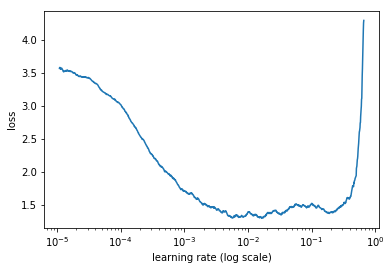

 80%|████████  | 1373/1709 [00:30<00:07, 45.71it/s, loss=5.23]

In [9]:
learn.sched.plot()

In [10]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 10%|█         | 175/1709 [00:03<00:34, 45.11it/s, loss=1.86]

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.200986   1.12024    0.686843  
    1      1.064722   1.048174   0.698087                      
    2      1.022519   1.010511   0.707506                      
    3      1.021731   0.98139    0.712252                       
    4      0.947123   0.968409   0.716121                       



[0.96840852, 0.71612149532710279]

In [11]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.971557   0.947937   0.717363  
    1      0.919565   0.937451   0.72094                        
    2      0.890419   0.921089   0.726782                       
    3      0.845605   0.911796   0.7316                         
    4      0.842364   0.907189   0.732185                       



[0.90718937, 0.7321845794392523]

In [12]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.802454   0.896467   0.735105  
    1      0.74695    0.90161    0.733134                       
    2      0.744845   0.889662   0.738026                       
    3      0.743596   0.890688   0.738829                      
    4      0.715797   0.88796    0.739194                       



[0.88796002, 0.73919392523364491]

In [13]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.727522   0.883991   0.742188  
    1      0.692067   0.88224    0.741311                       
    2      0.703576   0.883329   0.742041                       
    3      0.701875   0.883302   0.743648                      
    4      0.657282   0.883166   0.741603                       



[0.88316631, 0.74160338785046731]

In [14]:
learn.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.719149   0.883453   0.742188  
    1      0.695387   0.88235    0.740946                       



[0.88235015, 0.74094626168224298]

In [15]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [16]:
log_preds,y = learn.TTA()


In [17]:
probs = np.mean(np.exp(log_preds),0)

In [18]:
accuracy_np(probs, y)

0.74063505999414692

In [19]:
y[10]=9

In [20]:
predictions = np.argmax(probs,axis=1)

In [21]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[ 133    3    2    0    1   13   22   40   80    0    7    0   26    0    0   33    4    0   13    3    5
     0   69    0]
 [   3   63    0    0    0    2    1    0   15    0    1    1    4    0    0    0    1    0    0    3    0
     0   30    0]
 [   7    0   21    0    2    0    1    0    4    0    0    0    0    0    0    1    0    0    0    0    0
     1    8    0]
 [   1    0    0   23    0    0    0    5    0    0    0    0    0    0    0   11    0    0    5    0    0
     0    1    0]
 [   1    0    0    0  275    1    0    2    3    0    3    0    0    0    0  177    0    0   28    0    2
     1   20    0]
 [  15    1    0    0    1  129    7   20   32    0    4    0    4    1    0   12    1    0    2    5    0
     0   38    0]
 [  19    0    0    0    0    9  185    7   31    0    1    0    6    0    0   14    0    0    3    2    0
     0   30    0]
 [  27    0    1    0    7   20    9  198   16    0    0    1    1    0    1   64    

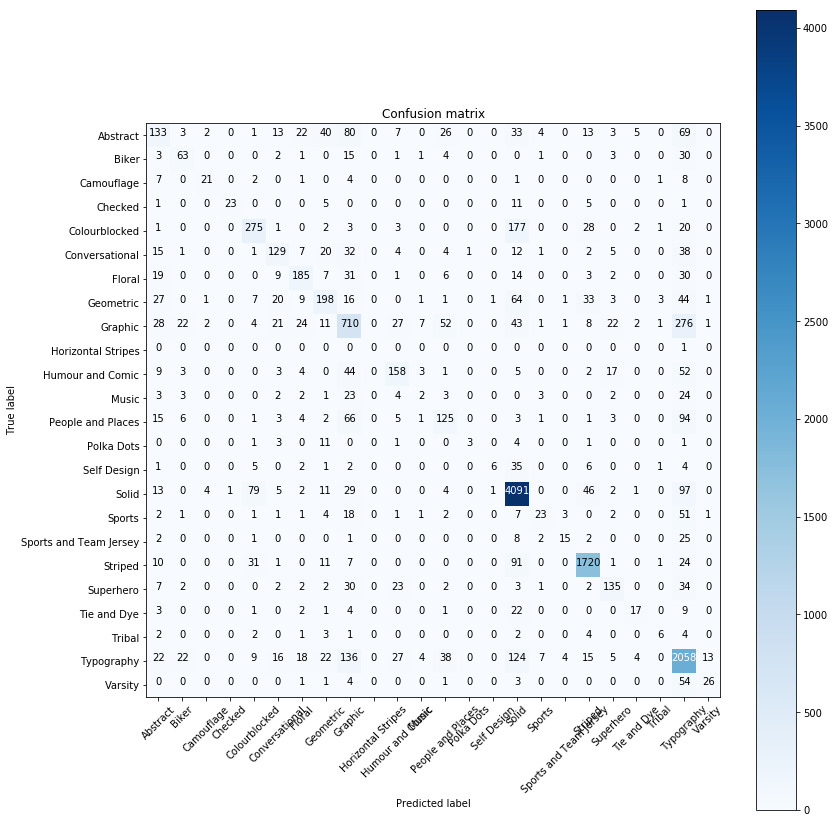

In [22]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.29295  0.00661  0.00441  0.       0.0022   0.02863  0.04846  0.08811  0.17621  0.       0.01542  0.
   0.05727  0.       0.       0.07269  0.00881  0.       0.02863  0.00661  0.01101  0.       0.15198  0.     ]
 [ 0.02419  0.50806  0.       0.       0.       0.01613  0.00806  0.       0.12097  0.       0.00806  0.00806
   0.03226  0.       0.       0.       0.00806  0.       0.       0.02419  0.       0.       0.24194  0.     ]
 [ 0.15556  0.       0.46667  0.       0.04444  0.       0.02222  0.       0.08889  0.       0.       0.       0.
   0.       0.       0.02222  0.       0.       0.       0.       0.       0.02222  0.17778  0.     ]
 [ 0.02174  0.       0.       0.5      0.       0.       0.       0.1087   0.       0.       0.       0.       0.
   0.       0.       0.23913  0.       0.       0.1087   0.       0.       0.       0.02174  0.     ]
 [ 0.00195  0.       0.       0.       0.53606  0.00195  0.       0.0039   0.00585  0.       0.00585  0

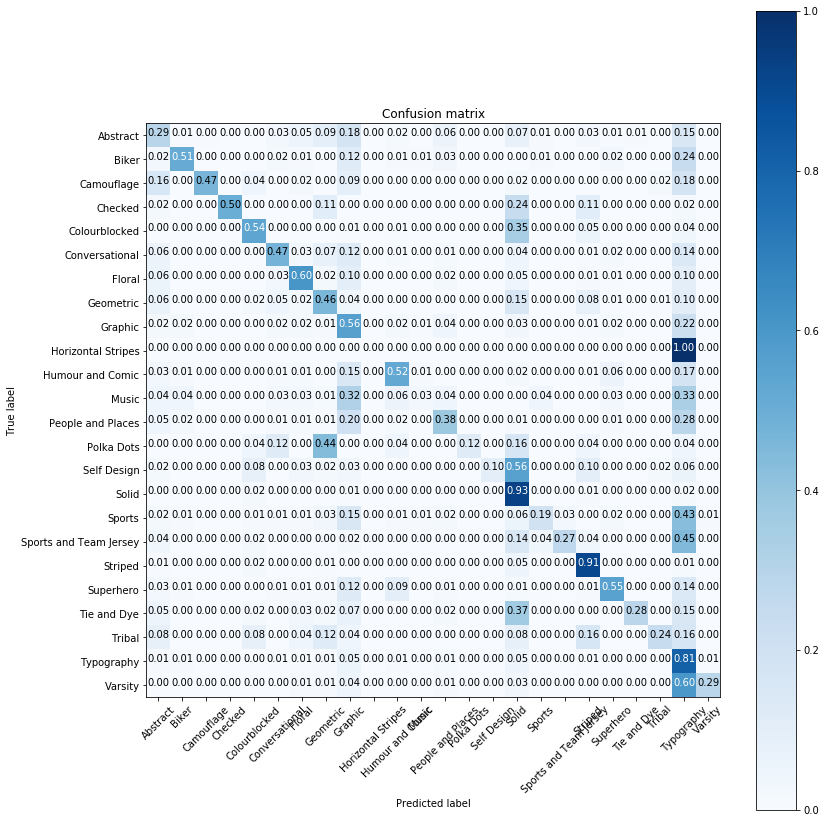

In [23]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

# 0.4 -> must generalize better

In [24]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.4)

In [25]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 1335/1709 [00:14<00:04, 91.38it/s, loss=5.56]

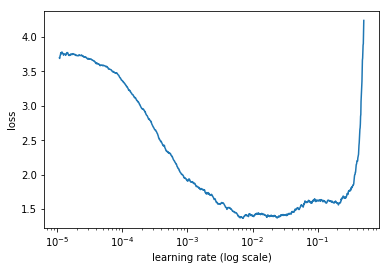

 78%|███████▊  | 1335/1709 [00:30<00:08, 44.46it/s, loss=5.56]

In [26]:
learn.sched.plot()

In [27]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 18%|█▊        | 305/1709 [00:07<00:33, 41.80it/s, loss=1.39]

Exception in thread Thread-35:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.146258   1.02087    0.698087  
    1      1.058088   0.981178   0.705827                      
    2      1.014972   0.952964   0.717144                       
    3      0.99734    0.93396    0.719553                       
    4      0.941566   0.927644   0.720867                       



[0.92764354, 0.72086740654205606]

In [28]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.960327   0.914987   0.725248  
    1      0.889528   0.904939   0.726782                      



[0.90493888, 0.72678154205607481]

In [29]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.938151   0.895046   0.732039  
    1      0.896157   0.894563   0.729921                       



[0.89456314, 0.72992114485981308]

In [30]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.858501   0.884526   0.733353  
    1      0.83089    0.885037   0.733718                       
    2      0.832953   0.880452   0.734886                      
    3      0.841425   0.878652   0.735178                       
    4      0.833193   0.877871   0.73474                        



[0.87787092, 0.73474007009345799]

In [31]:
log_preds,y = learn.TTA()


In [32]:
probs = np.mean(np.exp(log_preds),0)

In [33]:
accuracy_np(probs, y)

0.7344161545215101

In [34]:
y[10]=9

In [35]:
predictions = np.argmax(probs,axis=1)

In [36]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[ 102    2    1    0    4   12   17   37   93    0   10    0   22    0    0   47    3    0   15    5    5
     1   78    0]
 [   3   55    0    0    0    0    1    0   16    0    1    0    5    0    0    1    1    0    1    3    0
     0   37    0]
 [   6    0   24    0    1    0    0    0    4    0    0    0    0    0    0    3    0    0    1    0    0
     0    6    0]
 [   0    0    0   23    0    0    0    7    0    0    0    0    0    0    0   10    0    0    5    0    0
     0    1    0]
 [   1    0    0    0  268    1    0    5    3    0    2    0    0    0    0  175    0    0   37    0    1
     0   20    0]
 [  13    1    1    0    1  118    9   24   30    0    7    0    2    0    0   13    1    1    3    3    0
     0   45    0]
 [  16    0    0    0    1    9  178    9   25    0    1    0    4    0    0   19    0    0    5    4    0
     0   36    0]
 [  18    0    1    0    7   20    8  196   19    0    1    1    1    0    0   76    

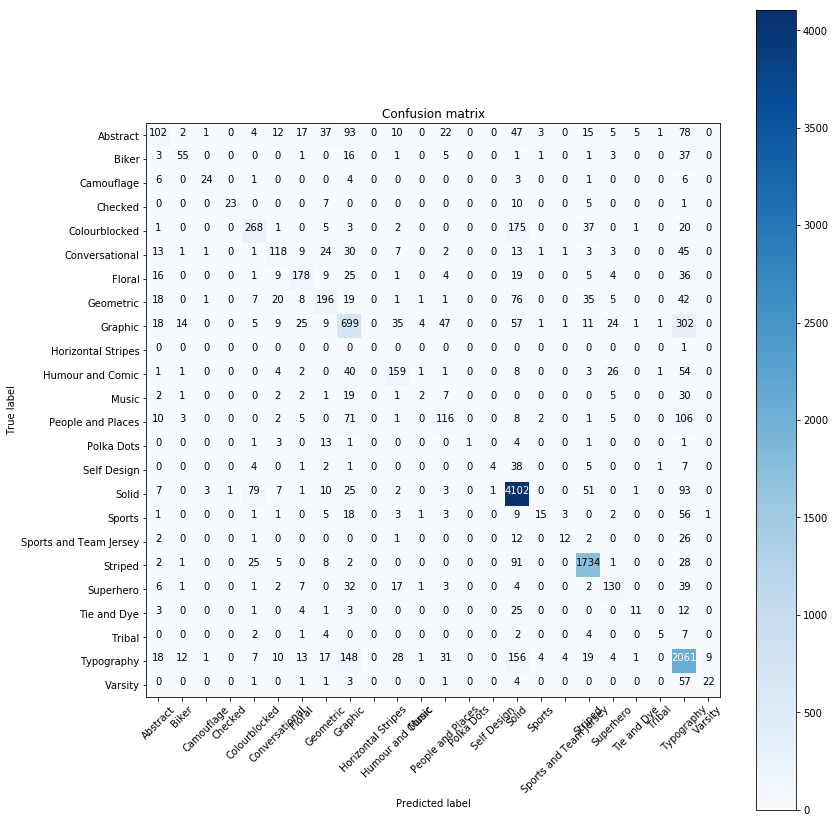

In [37]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.22467  0.00441  0.0022   0.       0.00881  0.02643  0.03744  0.0815   0.20485  0.       0.02203  0.
   0.04846  0.       0.       0.10352  0.00661  0.       0.03304  0.01101  0.01101  0.0022   0.17181  0.     ]
 [ 0.02419  0.44355  0.       0.       0.       0.       0.00806  0.       0.12903  0.       0.00806  0.
   0.04032  0.       0.       0.00806  0.00806  0.       0.00806  0.02419  0.       0.       0.29839  0.     ]
 [ 0.13333  0.       0.53333  0.       0.02222  0.       0.       0.       0.08889  0.       0.       0.       0.
   0.       0.       0.06667  0.       0.       0.02222  0.       0.       0.       0.13333  0.     ]
 [ 0.       0.       0.       0.5      0.       0.       0.       0.15217  0.       0.       0.       0.       0.
   0.       0.       0.21739  0.       0.       0.1087   0.       0.       0.       0.02174  0.     ]
 [ 0.00195  0.       0.       0.       0.52242  0.00195  0.       0.00975  0.00585  0.       0.0039   0.    

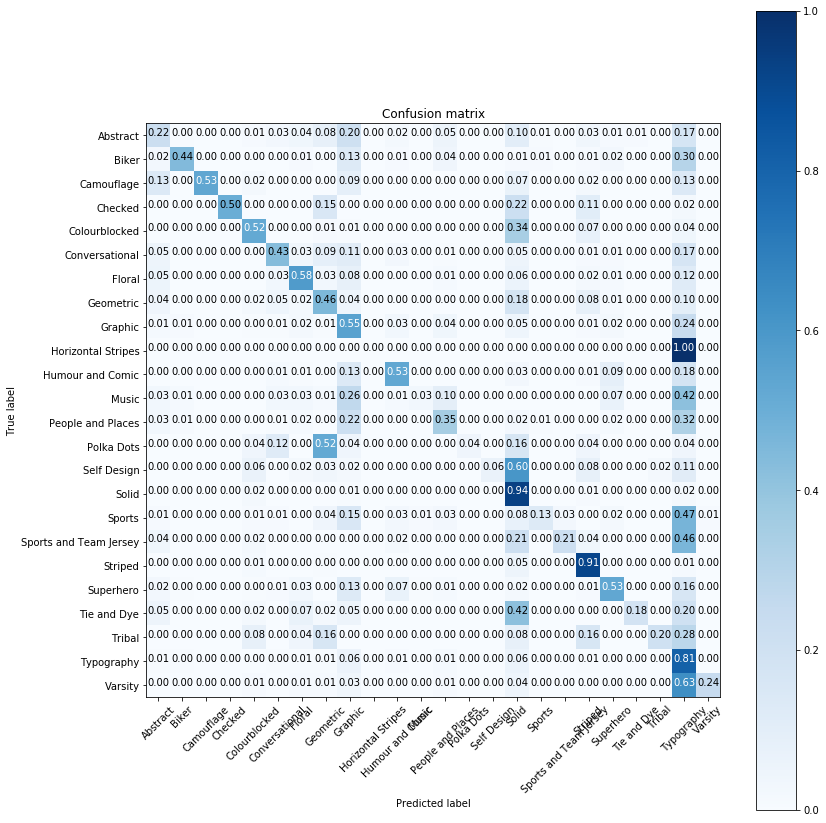

In [38]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)